<a href="https://colab.research.google.com/github/JieShenAI/kaggle/blob/main/mli/conv/Conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [13]:
from torch import nn

# 给定卷积核进行卷积

卷积核为[1,-1]的边缘检测的案例

原始

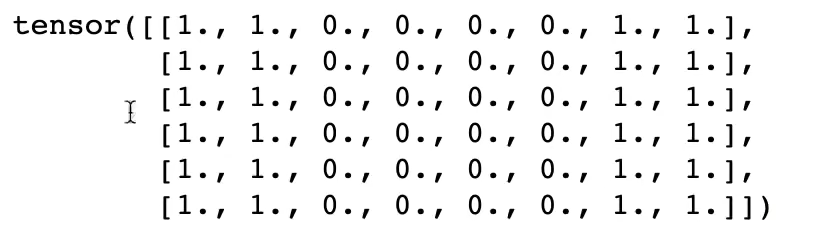

卷积之后


**1代表从白色到黑色，-1代表从黑色到白色**

卷积前的相同的2列，卷积后这2列都变成0。意味着卷积后留下不同元素的交叉部分，同一类的元素变成0。也就是边缘检测。

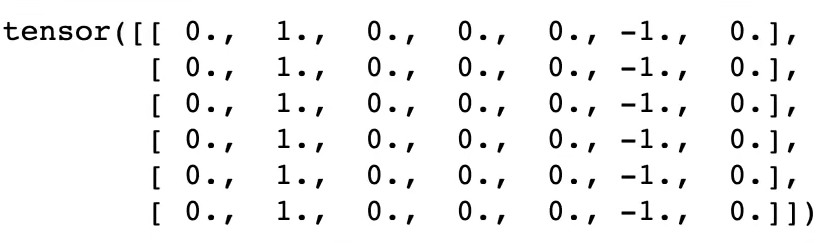

## 输入

In [2]:
x = torch.ones(6,8)
x[:,2:6] = 0

In [3]:
x,x.shape

(tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.]]), torch.Size([6, 8]))

view和reshape都是返回tensor，不是原地修改

## 输入维度分析

1. batch_size
2. input_channel

In [4]:
x = x.view(1,1,6,8)
x,x.shape

(tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.]]]]), torch.Size([1, 1, 6, 8]))

[[1,-1]]卷积核

若两列相同则返回0，两列不同返回1或者-1。

In [5]:
K = torch.Tensor([[1,-1]])

In [6]:
conv = torch.nn.Conv2d(1,1,(1,2))

## conv内部权重

## conv weight

In [7]:
conv.weight.data.shape

torch.Size([1, 1, 1, 2])

In [8]:
K = K.view(1,1,1,2)
K,K.shape

(tensor([[[[ 1., -1.]]]]), torch.Size([1, 1, 1, 2]))

In [9]:
conv.weight.data = K

## conv bias赋值

In [10]:
conv.bias.data,conv.bias.data.shape

(tensor([-0.2717]), torch.Size([1]))

In [11]:
conv.bias.data = torch.Tensor([0])

In [16]:
y = conv(x)

In [33]:
y,y.shape

(tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]],
        grad_fn=<ThnnConv2DBackward0>), torch.Size([1, 1, 6, 7]))

## multi-kernels

K = torch.randn(16,3,5,5)

16对应的是输出的通道数

3对应的是上一次输出的通道数

5,5是卷积核

如何将设置的kernels传给conv

# 根据结果预测卷积核

## 面向过程写法

In [31]:
x = torch.Tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.]]]])

In [32]:
x.shape,x.requires_grad

(torch.Size([1, 1, 6, 8]), False)

In [34]:
y = torch.Tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]])

In [35]:
y.shape,y.requires_grad

(torch.Size([1, 1, 6, 7]), False)

给x,y增加需要梯度

In [36]:
x.requires_grad = True
y.requires_grad = True

In [37]:
conv2d = nn.Conv2d(1,1,kernel_size = (1,2),bias=False)

In [ ]:
x=torch.tensor(3.0,requires_grad=True)
y=torch.pow(x,2)

#判断x,y是否是可以求导的
print(x.requires_grad)
print(y.requires_grad)

#求导，通过backward函数来实现
y.backward()

#查看导数，也即所谓的梯度
print(x.grad)

In [38]:
for i in range(15):
  y_hat = conv2d(x)
  loss = (y_hat-y)**2
  conv2d.zero_grad()
  loss.sum().backward()
  conv2d.weight.data[:] -= 3e-2 * conv2d.weight.grad
  print(f'batch {i},loss {loss.sum():.3f}')

batch 0,loss 10.602
batch 1,loss 5.585
batch 2,loss 3.083
batch 3,loss 1.772
batch 4,loss 1.052
batch 5,loss 0.639
batch 6,loss 0.395
batch 7,loss 0.247
batch 8,loss 0.156
batch 9,loss 0.099
batch 10,loss 0.063
batch 11,loss 0.040
batch 12,loss 0.026
batch 13,loss 0.016
batch 14,loss 0.010


In [39]:
conv2d.weight.data

tensor([[[[ 1.0097, -0.9886]]]])

## 模板写法

In [86]:
x = torch.Tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.]]]])
y = torch.Tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]])
x.requires_grad = True
y.requires_grad = True

In [87]:
my_conv2d = torch.nn.Conv2d(1,1,(1,2),bias=False)
net = nn.Sequential(my_conv2d)
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
for i in range(350):
  l = loss(net(x) ,y)
  trainer.zero_grad()
  l.sum().backward()
  trainer.step()
  if i % 5 == 0:
    print(f'batch {i},loss {l.sum():.3f}')

batch 0,loss 0.364
batch 5,loss 0.274
batch 10,loss 0.212
batch 15,loss 0.169
batch 20,loss 0.139
batch 25,loss 0.117
batch 30,loss 0.101
batch 35,loss 0.088
batch 40,loss 0.078
batch 45,loss 0.070
batch 50,loss 0.063
batch 55,loss 0.057
batch 60,loss 0.052
batch 65,loss 0.047
batch 70,loss 0.043
batch 75,loss 0.039
batch 80,loss 0.036
batch 85,loss 0.033
batch 90,loss 0.030
batch 95,loss 0.028
batch 100,loss 0.025
batch 105,loss 0.023
batch 110,loss 0.021
batch 115,loss 0.020
batch 120,loss 0.018
batch 125,loss 0.017
batch 130,loss 0.015
batch 135,loss 0.014
batch 140,loss 0.013
batch 145,loss 0.012
batch 150,loss 0.011
batch 155,loss 0.010
batch 160,loss 0.009
batch 165,loss 0.008
batch 170,loss 0.008
batch 175,loss 0.007
batch 180,loss 0.006
batch 185,loss 0.006
batch 190,loss 0.005
batch 195,loss 0.005
batch 200,loss 0.005
batch 205,loss 0.004
batch 210,loss 0.004
batch 215,loss 0.004
batch 220,loss 0.003
batch 225,loss 0.003
batch 230,loss 0.003
batch 235,loss 0.002
batch 240,loss

In [88]:
my_conv2d.weight.data

tensor([[[[ 0.9654, -0.9654]]]])